# Finding the Best Markets to Advertise In
Quick Analysis on the best market to investment
Link: https://github.com/dataquestio/solutions/blob/master/Mission310Solutions.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
fcc=pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=0)

print(fcc.shape)
fcc.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Understanding the Data
To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable result.

One good candidate for our purpose is freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this GitHub repository. Below, we'll do a quick exploration of the 2017-fCC-New-Coders-Survey-Data.csv file stored in the clean-data folder of the repository we just mentioned. We'll read in the file using the direct link here.

# Checking for Sample Representativity
As we mentioned in the introduction, most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

Where are these new coders located.
What locations have the greatest densities of new coders.
How much money they're willing to spend on learning.
So we first need to clarify whether the data set has the right categories of people for our purpose. The JobRoleInterest column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [3]:
fcc['JobRoleInterest'].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                          11.770595
  Front-End Web Developer                                                                                                                                                                          6.435927
  Data Scientist                                                                                                                                                                                   2.173913
Back-End Web Developer                                                                                                                                                                             2.030892
  Mobile Developer                                                                                                                                                                      

The information in the table above is quite granular, but from a quick scan it looks like:

1. A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
2. A few people are interested in mobile development.
3. few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. Consequently, in the next code block, we'll:

1. Split each string in the JobRoleInterest column to find the number of options for each participant.
2. We'll first drop the null values because we can't split Nan values.
3. Generate a frequency table for the variable describing the number of options.

In [4]:
interests_no_nulls = fcc['JobRoleInterest'].dropna()
splitted_interests= interests_no_nulls.str.split(',')

# Frequency table for the var describing the number of options
n_of_options=splitted_interests.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


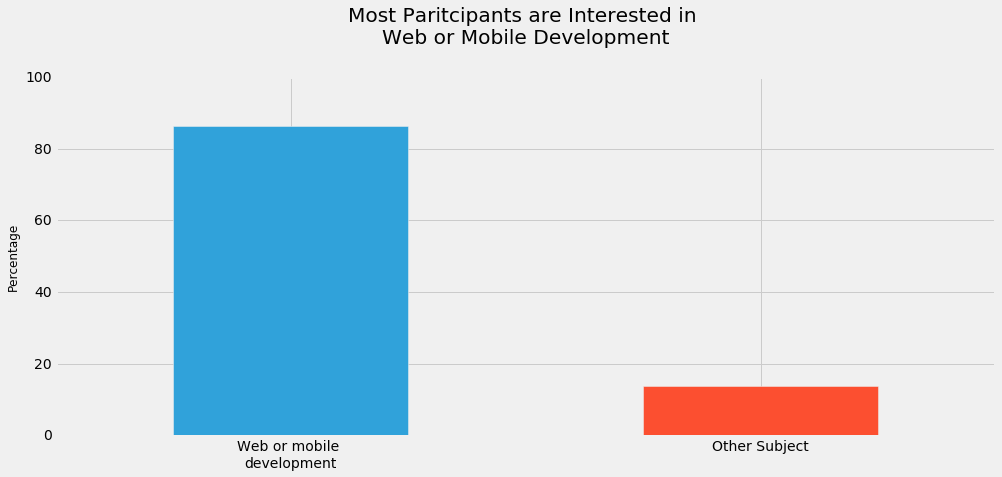

In [13]:

# Frequency table
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table above
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot(kind='bar', figsize=(15,6))
plt.title("Most Paritcipants are Interested in \nWeb or Mobile Development", y=1.08)
plt.ylabel('Percentage', fontsize= 12)
plt.xticks([0,1],['Web or mobile \ndevelopment', 'Other Subject'],rotation=0)
plt.ylim([0,100])
plt.show()

From the graph above, about 86% of paticipants are interested in either web or mobile development. This indicates the sample that we picked are representative of the population.

# New Coders - Location and Densities

This subsection will focus on seeing where new coders are located and what densities is for each location. We will be using the CountryLive column because we are interested in advertising to customers within a particular country i.e. where they live as opposed to their place of birth. 

In [19]:
fcc_good=fcc[fcc['JobRoleInterest'].notnull()].copy()
#Frequency tables with absolute and relative frequencies
absolute_frequencies = fcc_good['CountryLive'].value_counts()
relative_frequencies = fcc_good['CountryLive'].value_counts(normalize=True)
#Print top results

pd.DataFrame(data= {'Absolute frequency': absolute_frequencies,
                   "Percentage": relative_frequencies})

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Name: CountryLive, dtype: int64
United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Name: CountryLive, dtype: float64


,Absolute frequency,Percentage
United States of America,3125,0.457005
India,528,0.077216
United Kingdom,315,0.046066
Canada,260,0.038023
Poland,131,0.019158
Brazil,129,0.018865
Germany,125,0.018280
Australia,112,0.016379
Russia,102,0.014917
Ukraine,89,0.013016


45.7% of the potential customers are located in the US- indicating this seems like an interesting market. India has the second customer desntity, but it's 7.7%, which is not too far from United Kingdom (4.6%) or Canada (3.8%).

We need to go further because we need to assess how much people are willing to pay.

# Spending Money for Learning

The *MoneyForLearning* column describes in American dollars the amount of money spent by participants from the moment they started coding until the survey was completed. The firm sells subscription at $59 dollars/ month, so we will examine how much each person spends per month. 

The analysis will be narrowed down to the following four countries: US, India, the United Kingdom and Canada. This is because they're the countries with the highest frequencies and all the courses are created in English, so can be digested fully by the audience.

In [24]:
fcc_good['MonthsProgramming'].replace(0,1,inplace=True)

fcc_good['Monthly_spend']= fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']
fcc_good['Monthly_spend'].isnull().sum()

675

Let's keep the rows that do not have null values for the money_per_month column.

In [25]:
fcc_good=fcc_good[fcc_good['Monthly_spend'].notnull()]

We want to group the data by country, and then measure the average amount of money that student spends on average each month for the countries.

In [27]:
fcc_good= fcc_good[fcc_good['CountryLive'].notnull()]
fcc_good['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [30]:
countries_mean = fcc_good.groupby(['CountryLive']).mean()
countries_mean['Monthly_spend'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: Monthly_spend, dtype: float64

Relative to India, the results from United Kingdom and Canada are suprising. If we assess socio-economical metrics such as GDP and unemployment, we will expect UK and Canada to spend more on learning than India.

It is possible the data does not provide a fair representation of the UNited Kingdom and Canada. Or perhaps, there are some outliers in the dataset.

# Dealing with Extreme Outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



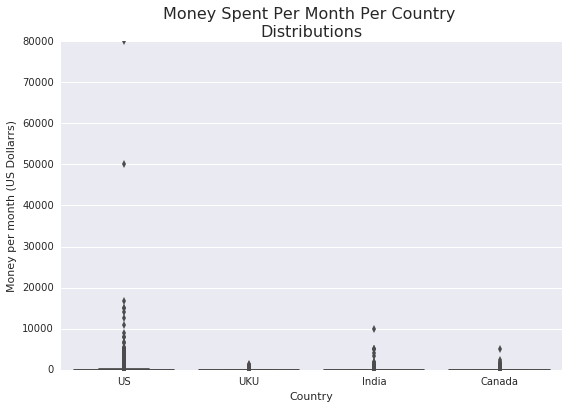

In [37]:
# Isolate only the countries of interest
only_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
import seaborn as sns
sns.boxplot(y = 'Monthly_spend', x = 'CountryLive',
           data= only_4)
plt.title('Money Spent Per Month Per Country \nDistributions',
         fontsize = 16)
plt.ylabel('Money per month (US Dollarrs)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UKU', 'India', 'Canada'])
plt.show()


It is hard to see from the plot above if there's anything wrong with the data for the United Kingdom, India or Canada, but we can see it immediately that there's some outlies in the US. two persons spend each month $50,000 or more for learning. It is highly unlikely but we will remove values where values are over 20,000/ month.

In [39]:
fcc_good = fcc_good[fcc_good['Monthly_spend'] < 20000]

In [42]:
countries_mean= fcc_good.groupby('CountryLive').mean()
countries_mean['Monthly_spend'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: Monthly_spend, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



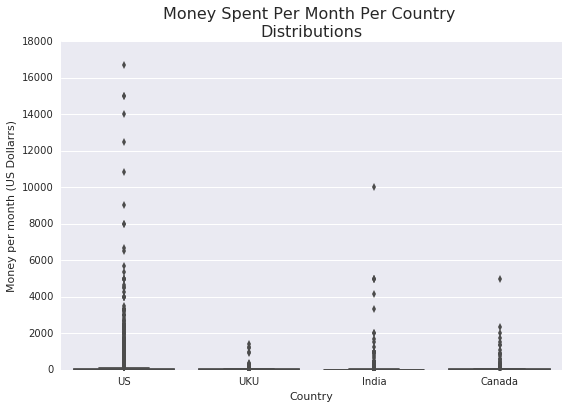

In [43]:
# Isolate only the countries of interest
only_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
import seaborn as sns
sns.boxplot(y = 'Monthly_spend', x = 'CountryLive',
           data= only_4)
plt.title('Money Spent Per Month Per Country \nDistributions',
         fontsize = 16)
plt.ylabel('Money per month (US Dollarrs)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UKU', 'India', 'Canada'])
plt.show()


We can see that are a few outliets for India (values over $2500 per month), but it is unclear whether this is good data or not. Maybe these are bootcamps. Nonetheless, we will examine these data points. 

In [48]:
india_outliers = only_4[
    (only_4['CountryLive'] == 'India') & 
    (only_4['Monthly_spend'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Monthly_spend
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


None of the participants attended a bootcamp. It is therefore, hard to assess whether this was a data error.

In [50]:
#Remove the outliers for India
only_4 = only_4.drop(india_outliers.index) # using the row labels

In [52]:
# Examine the extreme outliers for the US
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['Monthly_spend'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Monthly_spend
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Out of the 11 extreme outliers, six people attended bootcamps, which justifies the vast amount of money spent learning. For the remaining subjects, it is hard to figure out from the data where they could have spent the money on learning. As a result, we will remove those rows where participants reported that they spend $6000/ month but never attended a bootcamp.

Also, from the data, eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last a few months.

In the next code block, we'll remove respondents that:
* Didn't attend bootcamps.
* had been progrmaming for three months or less when at the time they completed the survey.


In [57]:
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['Monthly_spend'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0 )]

only_4=only_4.drop(us_outliers.index)

# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['Monthly_spend'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

In [58]:
ca_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['Monthly_spend'] >= 4500)]

ca_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Monthly_spend
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [59]:
# remove the extreme outliers for Canada

only_4 = only_4.drop(ca_outliers.index)

Let's recompute the mean values and generate the final box plots.

In [61]:
only_4.groupby('CountryLive').mean()['Monthly_spend']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: Monthly_spend, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



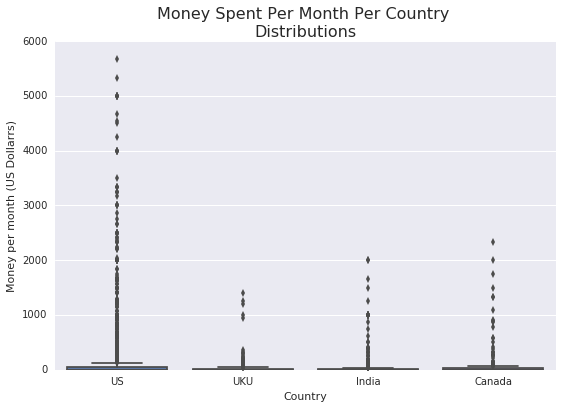

In [62]:
import seaborn as sns
sns.boxplot(y = 'Monthly_spend', x = 'CountryLive',
           data= only_4)
plt.title('Money Spent Per Month Per Country \nDistributions',
         fontsize = 16)
plt.ylabel('Money per month (US Dollarrs)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UKU', 'India', 'Canada'])
plt.show()


# Choosing the Two Best Markets

One of the country to advertise is in the US. There are a number of new coders and they are willing to pay a good amount of money monthly.

We sell subscriptions at a price of \$59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly \$93 per month, compared to India (\$66) and the United Kingdom (\$45).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

* $59 doesn't seem like an expensive sum for people in India since they spend on average \$66 each month.
* We have almost twice as more potential customers in India than we have in Canada:

In [63]:
# Frequency table for the 'CountryLive' column
only_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

It is quite hard to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

We can apply the formaula, the options:

1. Split the investment such as 60% for the YS, 25% for India, 15% for Canada.

2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to spplit it according to their size.

3. Advertise only in the US.

At this point, it is better to send it back to the marketing team to analyse and come up with a conclusion.

# Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.